In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
cd '/content/gdrive/My Drive/Colab Notebooks/ATSGD/cifar100'

/content/gdrive/My Drive/Colab Notebooks/ATSGD/cifar100


In [3]:
import matplotlib.pyplot as plt
import torch
import numpy as np

In [4]:
# def plot(names, curve_type='train', labels = None, ylim=(80,101), loc = 'upper left'):
#     plt.figure()
#     plt.ylim(ylim)# if curve_type == 'train' else 96)
#     paths = [os.path.join(folder_path, name) for name in names]
#     # for path in paths:
#     path = './Results/CIFAR10_B64_LR001_ResNet18_Adam.txt'
#     f = open(path, "r")
#     content = f.read()
#     print(shape(content))
#     # for i, label in zip(curve_data.keys(),labels):
#     #     acc = np.array(curve_data[i]['{}_acc'.format(curve_type.lower())])
#     #     if label == 'AdaBelief':
#     #         plt.plot(acc, '-', label=label)
#     #     else:
#     #         plt.plot(acc, '--',label = label)
    
#     # plt.grid()
#     # plt.legend(fontsize=14, loc=loc)
#     # plt.title('{} accuracy ~ Training epoch'.format(curve_type))
#     # plt.xlabel('Training Epoch')
#     # plt.ylabel('Accuracy')
#     # plt.show()

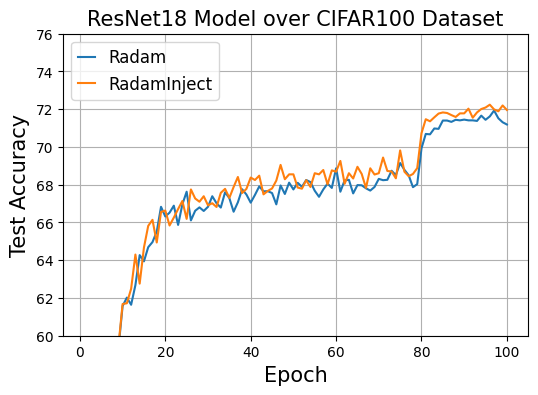

In [12]:
names = ['CIFAR100_B64_LR001_ResNet18_Adam.txt',
         'CIFAR100_B64_LR001_ResNet18_sadam.txt',
]
labels = ['Radam',
          'RadamInject',
        ]
dataset = 'CIFAR100'
Model = 'ResNet18'
#plot(names, 'Train', labels)
# plot(names, 'Test', labels, ylim = (88,96))    

plt.figure()
plt.rcParams['figure.dpi']= 100
# plt.rcParams['figure.figsize'] = [4, 2.0]
plt.ylim(60,76)# if curve_type == 'train' else 96)
for path in names:
  # path = './Results/CIFAR10_B64_LR001_ResNet18_Adam.txt'
  path = './Results/' + path
  f = open(path, "r")
  train_loss = []
  train_acc = []
  test_loss = []
  test_acc = []
  lines_to_read_train = range(0,200,2)
  lines_to_read_test = range(1,200,2)
  for position, line in enumerate(f):
    if position in lines_to_read_train:
      train_loss_index = line.find("Loss") + 6
      train_loss.append(float(line[train_loss_index:train_loss_index+6]))
      train_acc_index = line.find("Acc") + 5
      train_acc.append(float(line[train_acc_index:train_acc_index+7]))
    if position in lines_to_read_test:
      test_loss_index = line.find("Loss") + 6
      test_loss.append(float(line[test_loss_index:test_loss_index+6]))
      test_acc_index = line.find("Acc") + 5
      test_acc.append(float(line[test_acc_index:test_acc_index+7]))
  plt.plot(range(1,101), test_acc,)
plt.grid()
plt.legend(labels, loc='upper left', handlelength=1, fontsize=12)
plt.title(Model + ' Model over ' + dataset + ' Dataset', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Test Accuracy', fontsize=15)
plt.show()
